In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

v031.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/notebooks


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
torch.backends.cudnn.enabled = True
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [3]:
%autoreload

#cohort = mre_pinn.data.PatientCohort(patient_ids=['0006', '0020'], xarray_dir='../data/NAFLD')
cohort = mre_pinn.data.PatientCohort.from_file('../data/NAFLD/NAFLD_2022-11-7.xarrays', xarray_dir='../data/NAFLD')
#cohort.create_xarrays()
#cohort.save_xarrays()
#cohort.metadata
cohort.load_xarrays()
cohort.eval_baseline()

/ocean/projects/asc170022p/shared/Data/MRE/MRE_DICOM_7-31-19/NIFTI/0213 is missing sequences {'wave', 't2', 'mre_raw', 'mre'}
  0%|          | 0/155 [00:00<?, ?it/s]Loading ../data/NAFLD/0898/t1_pre_in.nc
Loading ../data/NAFLD/0898/t1_pre_water.nc
Loading ../data/NAFLD/0898/t1_pre_out.nc
Loading ../data/NAFLD/0898/t1_pre_fat.nc
Loading ../data/NAFLD/0898/t2.nc
Loading ../data/NAFLD/0898/mre_raw.nc
Loading ../data/NAFLD/0898/wave.nc
Loading ../data/NAFLD/0898/mre.nc
Loading ../data/NAFLD/0898/anat_mask.nc
Loading ../data/NAFLD/0898/mre_mask.nc
Loading ../data/NAFLD/0900/t1_pre_in.nc
Loading ../data/NAFLD/0900/t1_pre_water.nc
Loading ../data/NAFLD/0900/t1_pre_out.nc
Loading ../data/NAFLD/0900/t1_pre_fat.nc
Loading ../data/NAFLD/0900/t2.nc
Loading ../data/NAFLD/0900/mre_raw.nc
Loading ../data/NAFLD/0900/wave.nc
Loading ../data/NAFLD/0900/mre.nc
Loading ../data/NAFLD/0900/anat_mask.nc
Loading ../data/NAFLD/0900/mre_mask.nc
Loading ../data/NAFLD/0929/t1_pre_in.nc
Loading ../data/NAFLD/0929/

Loading ../data/NAFLD/1103/wave.nc
Loading ../data/NAFLD/1103/mre.nc
Loading ../data/NAFLD/1103/anat_mask.nc
Loading ../data/NAFLD/1103/mre_mask.nc
 14%|█▎        | 21/155 [00:01<00:06, 21.02it/s]Loading ../data/NAFLD/1106/t1_pre_in.nc
Loading ../data/NAFLD/1106/t1_pre_water.nc
Loading ../data/NAFLD/1106/t1_pre_out.nc
Loading ../data/NAFLD/1106/t1_pre_fat.nc
Loading ../data/NAFLD/1106/t2.nc
Loading ../data/NAFLD/1106/mre_raw.nc
Loading ../data/NAFLD/1106/wave.nc
Loading ../data/NAFLD/1106/mre.nc
Loading ../data/NAFLD/1106/anat_mask.nc
Loading ../data/NAFLD/1106/mre_mask.nc
Loading ../data/NAFLD/1108/t1_pre_in.nc
Loading ../data/NAFLD/1108/t1_pre_water.nc
Loading ../data/NAFLD/1108/t1_pre_out.nc
Loading ../data/NAFLD/1108/t1_pre_fat.nc
Loading ../data/NAFLD/1108/t2.nc
Loading ../data/NAFLD/1108/mre_raw.nc
Loading ../data/NAFLD/1108/wave.nc
Loading ../data/NAFLD/1108/mre.nc
Loading ../data/NAFLD/1108/anat_mask.nc
Loading ../data/NAFLD/1108/mre_mask.nc
Loading ../data/NAFLD/1110/t1_pre_in

Loading ../data/NAFLD/1337/t1_pre_fat.nc
Loading ../data/NAFLD/1337/t2.nc
Loading ../data/NAFLD/1337/mre_raw.nc
Loading ../data/NAFLD/1337/wave.nc
Loading ../data/NAFLD/1337/mre.nc
Loading ../data/NAFLD/1337/anat_mask.nc
Loading ../data/NAFLD/1337/mre_mask.nc
 27%|██▋       | 42/155 [00:01<00:04, 22.99it/s]Loading ../data/NAFLD/1341/t1_pre_in.nc
Loading ../data/NAFLD/1341/t1_pre_water.nc
Loading ../data/NAFLD/1341/t1_pre_out.nc
Loading ../data/NAFLD/1341/t1_pre_fat.nc
Loading ../data/NAFLD/1341/t2.nc
Loading ../data/NAFLD/1341/mre_raw.nc
Loading ../data/NAFLD/1341/wave.nc
Loading ../data/NAFLD/1341/mre.nc
Loading ../data/NAFLD/1341/anat_mask.nc
Loading ../data/NAFLD/1341/mre_mask.nc
Loading ../data/NAFLD/1343/t1_pre_in.nc
Loading ../data/NAFLD/1343/t1_pre_water.nc
Loading ../data/NAFLD/1343/t1_pre_out.nc
Loading ../data/NAFLD/1343/t1_pre_fat.nc
Loading ../data/NAFLD/1343/t2.nc
Loading ../data/NAFLD/1343/mre_raw.nc
Loading ../data/NAFLD/1343/wave.nc
Loading ../data/NAFLD/1343/mre.nc
Loa

Loading ../data/NAFLD/0029/anat_mask.nc
Loading ../data/NAFLD/0029/mre_mask.nc
Loading ../data/NAFLD/0043/t1_pre_in.nc
Loading ../data/NAFLD/0043/t1_pre_water.nc
Loading ../data/NAFLD/0043/t1_pre_out.nc
Loading ../data/NAFLD/0043/t1_pre_fat.nc
Loading ../data/NAFLD/0043/t2.nc
Loading ../data/NAFLD/0043/mre_raw.nc
Loading ../data/NAFLD/0043/wave.nc
Loading ../data/NAFLD/0043/mre.nc
Loading ../data/NAFLD/0043/anat_mask.nc
Loading ../data/NAFLD/0043/mre_mask.nc
 41%|████      | 63/155 [00:02<00:04, 22.05it/s]Loading ../data/NAFLD/0047/t1_pre_in.nc
Loading ../data/NAFLD/0047/t1_pre_water.nc
Loading ../data/NAFLD/0047/t1_pre_out.nc
Loading ../data/NAFLD/0047/t1_pre_fat.nc
Loading ../data/NAFLD/0047/t2.nc
Loading ../data/NAFLD/0047/mre_raw.nc
Loading ../data/NAFLD/0047/wave.nc
Loading ../data/NAFLD/0047/mre.nc
Loading ../data/NAFLD/0047/anat_mask.nc
Loading ../data/NAFLD/0047/mre_mask.nc
Loading ../data/NAFLD/0126/t1_pre_in.nc
Loading ../data/NAFLD/0126/t1_pre_water.nc
Loading ../data/NAFLD/

Loading ../data/NAFLD/0222/t1_pre_fat.nc
Loading ../data/NAFLD/0222/t2.nc
Loading ../data/NAFLD/0222/mre_raw.nc
Loading ../data/NAFLD/0222/wave.nc
Loading ../data/NAFLD/0222/mre.nc
Loading ../data/NAFLD/0222/anat_mask.nc
Loading ../data/NAFLD/0222/mre_mask.nc
Loading ../data/NAFLD/0234/t1_pre_in.nc
Loading ../data/NAFLD/0234/t1_pre_water.nc
Loading ../data/NAFLD/0234/t1_pre_out.nc
Loading ../data/NAFLD/0234/t1_pre_fat.nc
Loading ../data/NAFLD/0234/t2.nc
Loading ../data/NAFLD/0234/mre_raw.nc
Loading ../data/NAFLD/0234/wave.nc
Loading ../data/NAFLD/0234/mre.nc
Loading ../data/NAFLD/0234/anat_mask.nc
Loading ../data/NAFLD/0234/mre_mask.nc
 54%|█████▍    | 84/155 [00:03<00:03, 23.13it/s]Loading ../data/NAFLD/0235/t1_pre_in.nc
Loading ../data/NAFLD/0235/t1_pre_water.nc
Loading ../data/NAFLD/0235/t1_pre_out.nc
Loading ../data/NAFLD/0235/t1_pre_fat.nc
Loading ../data/NAFLD/0235/t2.nc
Loading ../data/NAFLD/0235/mre_raw.nc
Loading ../data/NAFLD/0235/wave.nc
Loading ../data/NAFLD/0235/mre.nc
Loa

Loading ../data/NAFLD/0653/anat_mask.nc
Loading ../data/NAFLD/0653/mre_mask.nc
Loading ../data/NAFLD/0655/t1_pre_in.nc
Loading ../data/NAFLD/0655/t1_pre_water.nc
Loading ../data/NAFLD/0655/t1_pre_out.nc
Loading ../data/NAFLD/0655/t1_pre_fat.nc
Loading ../data/NAFLD/0655/t2.nc
Loading ../data/NAFLD/0655/mre_raw.nc
Loading ../data/NAFLD/0655/wave.nc
Loading ../data/NAFLD/0655/mre.nc
Loading ../data/NAFLD/0655/anat_mask.nc
Loading ../data/NAFLD/0655/mre_mask.nc
Loading ../data/NAFLD/0659/t1_pre_in.nc
Loading ../data/NAFLD/0659/t1_pre_water.nc
Loading ../data/NAFLD/0659/t1_pre_out.nc
Loading ../data/NAFLD/0659/t1_pre_fat.nc
Loading ../data/NAFLD/0659/t2.nc
Loading ../data/NAFLD/0659/mre_raw.nc
Loading ../data/NAFLD/0659/wave.nc
Loading ../data/NAFLD/0659/mre.nc
Loading ../data/NAFLD/0659/anat_mask.nc
Loading ../data/NAFLD/0659/mre_mask.nc
 68%|██████▊   | 105/155 [00:04<00:02, 23.09it/s]Loading ../data/NAFLD/0693/t1_pre_in.nc
Loading ../data/NAFLD/0693/t1_pre_water.nc
Loading ../data/NAFLD

Loading ../data/NAFLD/1722/t1_pre_fat.nc
Loading ../data/NAFLD/1722/t2.nc
Loading ../data/NAFLD/1722/mre_raw.nc
Loading ../data/NAFLD/1722/wave.nc
Loading ../data/NAFLD/1722/mre.nc
Loading ../data/NAFLD/1722/anat_mask.nc
Loading ../data/NAFLD/1722/mre_mask.nc
Loading ../data/NAFLD/1727/t1_pre_in.nc
Loading ../data/NAFLD/1727/t1_pre_water.nc
Loading ../data/NAFLD/1727/t1_pre_out.nc
Loading ../data/NAFLD/1727/t1_pre_fat.nc
Loading ../data/NAFLD/1727/t2.nc
Loading ../data/NAFLD/1727/mre_raw.nc
Loading ../data/NAFLD/1727/wave.nc
Loading ../data/NAFLD/1727/mre.nc
Loading ../data/NAFLD/1727/anat_mask.nc
Loading ../data/NAFLD/1727/mre_mask.nc
Loading ../data/NAFLD/1736/t1_pre_in.nc
Loading ../data/NAFLD/1736/t1_pre_water.nc
Loading ../data/NAFLD/1736/t1_pre_out.nc
Loading ../data/NAFLD/1736/t1_pre_fat.nc
Loading ../data/NAFLD/1736/t2.nc
Loading ../data/NAFLD/1736/mre_raw.nc
Loading ../data/NAFLD/1736/wave.nc
Loading ../data/NAFLD/1736/mre.nc
Loading ../data/NAFLD/1736/anat_mask.nc
Loading ../

 93%|█████████▎| 144/155 [00:06<00:00, 22.75it/s]Loading ../data/NAFLD/1903/t1_pre_in.nc
Loading ../data/NAFLD/1903/t1_pre_water.nc
Loading ../data/NAFLD/1903/t1_pre_out.nc
Loading ../data/NAFLD/1903/t1_pre_fat.nc
Loading ../data/NAFLD/1903/t2.nc
Loading ../data/NAFLD/1903/mre_raw.nc
Loading ../data/NAFLD/1903/wave.nc
Loading ../data/NAFLD/1903/mre.nc
Loading ../data/NAFLD/1903/anat_mask.nc
Loading ../data/NAFLD/1903/mre_mask.nc
Loading ../data/NAFLD/1917/t1_pre_in.nc
Loading ../data/NAFLD/1917/t1_pre_water.nc
Loading ../data/NAFLD/1917/t1_pre_out.nc
Loading ../data/NAFLD/1917/t1_pre_fat.nc
Loading ../data/NAFLD/1917/t2.nc
Loading ../data/NAFLD/1917/mre_raw.nc
Loading ../data/NAFLD/1917/wave.nc
Loading ../data/NAFLD/1917/mre.nc
Loading ../data/NAFLD/1917/anat_mask.nc
Loading ../data/NAFLD/1917/mre_mask.nc
Loading ../data/NAFLD/1935/t1_pre_in.nc
Loading ../data/NAFLD/1935/t1_pre_water.nc
Loading ../data/NAFLD/1935/t1_pre_out.nc
Loading ../data/NAFLD/1935/t1_pre_fat.nc
Loading ../data/NA

  return key in self.data

  return key in self.data



  1%|          | 1/155 [00:00<00:31,  4.84it/s]

  return key in self.data

  return key in self.data



  1%|▏         | 2/155 [00:00<00:30,  5.01it/s]

  return key in self.data

  return key in self.data



  2%|▏         | 3/155 [00:00<00:30,  5.01it/s]

  return key in self.data

  return key in self.data



  3%|▎         | 4/155 [00:00<00:29,  5.04it/s]

  return key in self.data

  return key in self.data



  3%|▎         | 5/155 [00:00<00:29,  5.07it/s]

  return key in self.data

  return key in self.data



  4%|▍         | 6/155 [00:01<00:29,  5.09it/s]

  return key in self.data

  return key in self.data



  5%|▍         | 7/155 [00:01<00:29,  5.10it/s]

  return key in self.data

  return key in self.data



  5%|▌         | 8/155 [00:01<00:28,  5.09it/s]

  return key in self.data

  return key in self.data



  6%|▌         | 9/155 [00:01<00:28,  5.10it/s]

  return key in self.data

  return key in self.data



  6%|▋         | 10/155 [00:01<00:28,  5.10it/s]

  return key in self.data

  return key in self.data



  7%|▋         | 11/155 [00:02<00:28,  5.12it/s]

  return key in self.data

  return key in self.data



  8%|▊         | 12/155 [00:02<00:27,  5.11it/s]

  return key in self.data

  return key in self.data



  8%|▊         | 13/155 [00:02<00:27,  5.11it/s]

  return key in self.data

  return key in self.data



  9%|▉         | 14/155 [00:02<00:27,  5.10it/s]

  return key in self.data

  return key in self.data



 10%|▉         | 15/155 [00:02<00:27,  5.10it/s]

  return key in self.data

  return key in self.data



 10%|█         | 16/155 [00:03<00:27,  5.14it/s]

  return key in self.data

  return key in self.data



 11%|█         | 17/155 [00:03<00:26,  5.13it/s]

  return key in self.data

  return key in self.data



 12%|█▏        | 18/155 [00:03<00:27,  5.07it/s]

  return key in self.data

  return key in self.data



 12%|█▏        | 19/155 [00:03<00:26,  5.06it/s]

  return key in self.data

  return key in self.data



 13%|█▎        | 20/155 [00:03<00:26,  5.07it/s]

  return key in self.data

  return key in self.data



 14%|█▎        | 21/155 [00:04<00:26,  5.04it/s]

  return key in self.data

  return key in self.data



 14%|█▍        | 22/155 [00:04<00:26,  5.07it/s]

  return key in self.data

  return key in self.data



 15%|█▍        | 23/155 [00:04<00:26,  5.07it/s]

  return key in self.data

  return key in self.data



 15%|█▌        | 24/155 [00:04<00:25,  5.09it/s]

  return key in self.data

  return key in self.data



 16%|█▌        | 25/155 [00:04<00:25,  5.10it/s]

  return key in self.data

  return key in self.data



 17%|█▋        | 26/155 [00:05<00:25,  5.10it/s]

  return key in self.data

  return key in self.data



 17%|█▋        | 27/155 [00:05<00:25,  5.11it/s]

  return key in self.data

  return key in self.data



 18%|█▊        | 28/155 [00:05<00:24,  5.12it/s]

  return key in self.data

  return key in self.data



 19%|█▊        | 29/155 [00:05<00:25,  4.96it/s]

  return key in self.data

  return key in self.data



 19%|█▉        | 30/155 [00:05<00:24,  5.01it/s]

  return key in self.data

  return key in self.data



 20%|██        | 31/155 [00:06<00:24,  5.04it/s]

  return key in self.data

  return key in self.data



 21%|██        | 32/155 [00:06<00:24,  5.07it/s]

  return key in self.data

  return key in self.data



 21%|██▏       | 33/155 [00:06<00:24,  5.08it/s]

  return key in self.data

  return key in self.data



 22%|██▏       | 34/155 [00:06<00:23,  5.06it/s]

  return key in self.data

  return key in self.data



 23%|██▎       | 35/155 [00:06<00:23,  5.07it/s]

  return key in self.data

  return key in self.data



 23%|██▎       | 36/155 [00:07<00:23,  5.08it/s]

  return key in self.data

  return key in self.data



 24%|██▍       | 37/155 [00:07<00:23,  5.09it/s]

  return key in self.data

  return key in self.data



 25%|██▍       | 38/155 [00:07<00:22,  5.10it/s]

  return key in self.data

  return key in self.data



 25%|██▌       | 39/155 [00:07<00:22,  5.12it/s]

  return key in self.data

  return key in self.data



 26%|██▌       | 40/155 [00:07<00:22,  5.13it/s]

  return key in self.data

  return key in self.data



 26%|██▋       | 41/155 [00:08<00:22,  5.13it/s]

  return key in self.data

  return key in self.data



 27%|██▋       | 42/155 [00:08<00:21,  5.14it/s]

  return key in self.data

  return key in self.data



 28%|██▊       | 43/155 [00:08<00:21,  5.15it/s]

  return key in self.data

  return key in self.data



 28%|██▊       | 44/155 [00:08<00:21,  5.15it/s]

  return key in self.data

  return key in self.data



 29%|██▉       | 45/155 [00:08<00:21,  5.17it/s]

  return key in self.data

  return key in self.data



 30%|██▉       | 46/155 [00:09<00:21,  5.17it/s]

  return key in self.data

  return key in self.data



 30%|███       | 47/155 [00:09<00:20,  5.16it/s]

  return key in self.data

  return key in self.data



 31%|███       | 48/155 [00:09<00:20,  5.16it/s]

  return key in self.data

  return key in self.data



 32%|███▏      | 49/155 [00:09<00:20,  5.12it/s]

  return key in self.data

  return key in self.data



 32%|███▏      | 50/155 [00:09<00:20,  5.14it/s]

  return key in self.data

  return key in self.data



 33%|███▎      | 51/155 [00:10<00:20,  5.14it/s]

  return key in self.data

  return key in self.data



 34%|███▎      | 52/155 [00:10<00:19,  5.15it/s]

  return key in self.data

  return key in self.data



 34%|███▍      | 53/155 [00:10<00:19,  5.16it/s]

  return key in self.data

  return key in self.data



 35%|███▍      | 54/155 [00:10<00:19,  5.17it/s]

  return key in self.data

  return key in self.data



 35%|███▌      | 55/155 [00:10<00:19,  5.17it/s]

  return key in self.data

  return key in self.data



 36%|███▌      | 56/155 [00:10<00:19,  5.18it/s]

  return key in self.data

  return key in self.data



 37%|███▋      | 57/155 [00:11<00:18,  5.17it/s]

  return key in self.data

  return key in self.data



 37%|███▋      | 58/155 [00:11<00:18,  5.16it/s]

  return key in self.data

  return key in self.data



 38%|███▊      | 59/155 [00:11<00:18,  5.16it/s]

  return key in self.data

  return key in self.data



 39%|███▊      | 60/155 [00:11<00:18,  5.14it/s]

  return key in self.data

  return key in self.data



 39%|███▉      | 61/155 [00:11<00:18,  5.13it/s]

  return key in self.data

  return key in self.data



 40%|████      | 62/155 [00:12<00:18,  5.12it/s]

  return key in self.data

  return key in self.data



 41%|████      | 63/155 [00:12<00:18,  5.10it/s]

  return key in self.data

  return key in self.data



 41%|████▏     | 64/155 [00:12<00:17,  5.10it/s]

  return key in self.data

  return key in self.data



 42%|████▏     | 65/155 [00:12<00:17,  5.09it/s]

  return key in self.data

  return key in self.data



 43%|████▎     | 66/155 [00:12<00:17,  5.08it/s]

  return key in self.data

  return key in self.data



 43%|████▎     | 67/155 [00:13<00:17,  5.09it/s]

  return key in self.data

  return key in self.data



 44%|████▍     | 68/155 [00:13<00:17,  5.04it/s]

  return key in self.data

  return key in self.data



 45%|████▍     | 69/155 [00:13<00:17,  5.06it/s]

  return key in self.data

  return key in self.data



 45%|████▌     | 70/155 [00:13<00:16,  5.07it/s]

  return key in self.data

  return key in self.data



 46%|████▌     | 71/155 [00:13<00:16,  5.07it/s]

  return key in self.data

  return key in self.data



 46%|████▋     | 72/155 [00:14<00:16,  5.07it/s]

  return key in self.data

  return key in self.data



 47%|████▋     | 73/155 [00:14<00:16,  5.08it/s]

  return key in self.data

  return key in self.data



 48%|████▊     | 74/155 [00:14<00:15,  5.09it/s]

  return key in self.data

  return key in self.data



 48%|████▊     | 75/155 [00:14<00:15,  5.09it/s]

  return key in self.data

  return key in self.data



 49%|████▉     | 76/155 [00:14<00:15,  5.08it/s]

  return key in self.data

  return key in self.data



 50%|████▉     | 77/155 [00:15<00:15,  5.09it/s]

  return key in self.data

  return key in self.data



 50%|█████     | 78/155 [00:15<00:15,  5.11it/s]

  return key in self.data

  return key in self.data



 51%|█████     | 79/155 [00:15<00:14,  5.11it/s]

  return key in self.data

  return key in self.data



 52%|█████▏    | 80/155 [00:15<00:14,  5.11it/s]

  return key in self.data

  return key in self.data



 52%|█████▏    | 81/155 [00:15<00:14,  5.11it/s]

  return key in self.data

  return key in self.data



 53%|█████▎    | 82/155 [00:16<00:14,  5.11it/s]

  return key in self.data

  return key in self.data



 54%|█████▎    | 83/155 [00:16<00:14,  5.11it/s]

  return key in self.data

  return key in self.data



 54%|█████▍    | 84/155 [00:16<00:13,  5.12it/s]

  return key in self.data

  return key in self.data



 55%|█████▍    | 85/155 [00:16<00:13,  5.11it/s]

  return key in self.data

  return key in self.data



 55%|█████▌    | 86/155 [00:16<00:13,  5.08it/s]

  return key in self.data

  return key in self.data



 56%|█████▌    | 87/155 [00:17<00:13,  5.08it/s]

  return key in self.data

  return key in self.data



 57%|█████▋    | 88/155 [00:17<00:13,  5.09it/s]

  return key in self.data

  return key in self.data



 57%|█████▋    | 89/155 [00:17<00:13,  5.08it/s]

  return key in self.data

  return key in self.data



 58%|█████▊    | 90/155 [00:17<00:12,  5.08it/s]

  return key in self.data

  return key in self.data



 59%|█████▊    | 91/155 [00:17<00:12,  5.08it/s]

  return key in self.data

  return key in self.data



 59%|█████▉    | 92/155 [00:18<00:12,  5.10it/s]

  return key in self.data

  return key in self.data



 60%|██████    | 93/155 [00:18<00:12,  5.09it/s]

  return key in self.data

  return key in self.data



 61%|██████    | 94/155 [00:18<00:11,  5.10it/s]

  return key in self.data

  return key in self.data



 61%|██████▏   | 95/155 [00:18<00:11,  5.10it/s]

  return key in self.data

  return key in self.data



 62%|██████▏   | 96/155 [00:18<00:11,  5.10it/s]

  return key in self.data

  return key in self.data



 63%|██████▎   | 97/155 [00:19<00:11,  5.10it/s]

  return key in self.data

  return key in self.data



 63%|██████▎   | 98/155 [00:19<00:11,  5.10it/s]

  return key in self.data

  return key in self.data



 64%|██████▍   | 99/155 [00:19<00:10,  5.11it/s]

  return key in self.data

  return key in self.data



 65%|██████▍   | 100/155 [00:19<00:10,  5.12it/s]

  return key in self.data

  return key in self.data



 65%|██████▌   | 101/155 [00:19<00:10,  5.11it/s]

  return key in self.data

  return key in self.data



 66%|██████▌   | 102/155 [00:19<00:10,  5.12it/s]

  return key in self.data

  return key in self.data



 66%|██████▋   | 103/155 [00:20<00:10,  5.12it/s]

  return key in self.data

  return key in self.data



 67%|██████▋   | 104/155 [00:20<00:09,  5.10it/s]

  return key in self.data

  return key in self.data



 68%|██████▊   | 105/155 [00:20<00:09,  5.10it/s]

  return key in self.data

  return key in self.data



 68%|██████▊   | 106/155 [00:20<00:09,  5.11it/s]

  return key in self.data

  return key in self.data



 69%|██████▉   | 107/155 [00:20<00:09,  5.10it/s]

  return key in self.data

  return key in self.data



 70%|██████▉   | 108/155 [00:21<00:09,  5.10it/s]

  return key in self.data

  return key in self.data



 70%|███████   | 109/155 [00:21<00:08,  5.13it/s]

  return key in self.data

  return key in self.data



 71%|███████   | 110/155 [00:21<00:08,  5.14it/s]

  return key in self.data

  return key in self.data



 72%|███████▏  | 111/155 [00:21<00:08,  5.15it/s]

  return key in self.data

  return key in self.data



 72%|███████▏  | 112/155 [00:21<00:08,  5.15it/s]

  return key in self.data

  return key in self.data



 73%|███████▎  | 113/155 [00:22<00:08,  5.16it/s]

  return key in self.data

  return key in self.data



 74%|███████▎  | 114/155 [00:22<00:07,  5.16it/s]

  return key in self.data

  return key in self.data



 74%|███████▍  | 115/155 [00:22<00:07,  5.16it/s]

  return key in self.data

  return key in self.data



 75%|███████▍  | 116/155 [00:22<00:07,  5.16it/s]

  return key in self.data

  return key in self.data



 75%|███████▌  | 117/155 [00:22<00:07,  5.17it/s]

  return key in self.data

  return key in self.data



 76%|███████▌  | 118/155 [00:23<00:07,  5.18it/s]

  return key in self.data

  return key in self.data



 77%|███████▋  | 119/155 [00:23<00:06,  5.18it/s]

  return key in self.data

  return key in self.data



 77%|███████▋  | 120/155 [00:23<00:06,  5.18it/s]

  return key in self.data

  return key in self.data



 78%|███████▊  | 121/155 [00:23<00:06,  5.18it/s]

  return key in self.data

  return key in self.data



 79%|███████▊  | 122/155 [00:23<00:06,  5.15it/s]

  return key in self.data

  return key in self.data



 79%|███████▉  | 123/155 [00:24<00:06,  5.16it/s]

  return key in self.data

  return key in self.data



 80%|████████  | 124/155 [00:24<00:06,  5.16it/s]

  return key in self.data

  return key in self.data



 81%|████████  | 125/155 [00:24<00:05,  5.15it/s]

  return key in self.data

  return key in self.data



 81%|████████▏ | 126/155 [00:24<00:05,  5.15it/s]

  return key in self.data

  return key in self.data



 82%|████████▏ | 127/155 [00:24<00:05,  5.15it/s]

  return key in self.data

  return key in self.data



 83%|████████▎ | 128/155 [00:25<00:05,  5.13it/s]

  return key in self.data

  return key in self.data



 83%|████████▎ | 129/155 [00:25<00:05,  5.10it/s]

  return key in self.data

  return key in self.data



 84%|████████▍ | 130/155 [00:25<00:04,  5.06it/s]

  return key in self.data

  return key in self.data



 85%|████████▍ | 131/155 [00:25<00:04,  5.06it/s]

  return key in self.data

  return key in self.data



 85%|████████▌ | 132/155 [00:25<00:04,  5.04it/s]

  return key in self.data

  return key in self.data



 86%|████████▌ | 133/155 [00:26<00:04,  5.03it/s]

  return key in self.data

  return key in self.data



 86%|████████▋ | 134/155 [00:26<00:04,  5.03it/s]

  return key in self.data

  return key in self.data



 87%|████████▋ | 135/155 [00:26<00:03,  5.02it/s]

  return key in self.data

  return key in self.data



 88%|████████▊ | 136/155 [00:26<00:03,  5.02it/s]

  return key in self.data

  return key in self.data



 88%|████████▊ | 137/155 [00:26<00:03,  5.02it/s]

  return key in self.data

  return key in self.data



 89%|████████▉ | 138/155 [00:27<00:03,  5.02it/s]

  return key in self.data

  return key in self.data



 90%|████████▉ | 139/155 [00:27<00:03,  5.02it/s]

  return key in self.data

  return key in self.data



 90%|█████████ | 140/155 [00:27<00:02,  5.03it/s]

  return key in self.data

  return key in self.data



 91%|█████████ | 141/155 [00:27<00:02,  5.00it/s]

  return key in self.data

  return key in self.data



 92%|█████████▏| 142/155 [00:27<00:02,  5.01it/s]

  return key in self.data

  return key in self.data



 92%|█████████▏| 143/155 [00:28<00:02,  5.02it/s]

  return key in self.data

  return key in self.data



 93%|█████████▎| 144/155 [00:28<00:02,  5.02it/s]

  return key in self.data

  return key in self.data



 94%|█████████▎| 145/155 [00:28<00:01,  5.02it/s]

  return key in self.data

  return key in self.data



 94%|█████████▍| 146/155 [00:28<00:01,  5.01it/s]

  return key in self.data

  return key in self.data



 95%|█████████▍| 147/155 [00:28<00:01,  5.02it/s]

  return key in self.data

  return key in self.data



 95%|█████████▌| 148/155 [00:29<00:01,  5.02it/s]

  return key in self.data

  return key in self.data



 96%|█████████▌| 149/155 [00:29<00:01,  5.02it/s]

  return key in self.data

  return key in self.data



 97%|█████████▋| 150/155 [00:29<00:00,  5.05it/s]

  return key in self.data

  return key in self.data



 97%|█████████▋| 151/155 [00:29<00:00,  5.09it/s]

  return key in self.data

  return key in self.data



 98%|█████████▊| 152/155 [00:29<00:00,  5.10it/s]

  return key in self.data

  return key in self.data



 99%|█████████▊| 153/155 [00:30<00:00,  5.10it/s]

  return key in self.data

  return key in self.data



 99%|█████████▉| 154/155 [00:30<00:00,  5.11it/s]

  return key in self.data

  return key in self.data



100%|██████████| 155/155 [00:30<00:00,  5.10it/s]


In [4]:
pde = mre_pinn.pde.WaveEquation.from_name('helmholtz', detach=False)
pde

In [5]:
%autoreload

pino = mre_pinn.model.pino.HyperCNN(
    n_channels_in=1,
    n_channels_block=16,
    n_conv_per_block=2,
    n_conv_blocks=5,
    width_factor=2,
    activ_fn='g',
    n_latent=128,
    n_spatial_freqs=128,
    u_omega=10/300,
    u_scale=1e2,
    mu_omega=10/300,
    mu_scale=5e2,
    skip_connect=True,
    dense=True,
    debug=True
)
pino

input		 1 [256 256   4]
conv_in		 16 [256 256   4]
conv_block0	 16 [256 256   4]
pool0		 16 [128 128   2]
conv_block1	 32 [128 128   2]
pool1		 32 [64 64  1]
conv_block2	 64 [64 64  1]
pool2		 64 [32 32  1]
conv_block3	 128 [32 32  1]
pool3		 128 [16 16  1]
conv_block4	 256 [16 16  1]
pool4		 256 [8 8 1]
linear_out	 128


HyperCNN(
  (cnn): CNN(
    (conv_in): Conv3d(1, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (conv_block0): ConvBlock(
      (conv0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool0): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block1): ConvBlock(
      (conv0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool1): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block2): ConvBlock(
      (conv0): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool2): AvgPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=0)
    (conv_block3): ConvBlock(
   

In [6]:
%autoreload

model = mre_pinn.training.PINOModel(cohort, pino, pde, patch_size=None, batch_size=8)
model.compile(
    optimizer='adam',
    lr=1e-5,
    loss_weights=[1e0, 0],
    loss=mre_pinn.training.losses.msae_loss
)   
test_eval = mre_pinn.testing.TestEvaluator(test_every=10, interact=True)

Compiling model...
'compile' took 0.000372 s



Training model...

Step      Train loss              Test loss               Test metric
0         [2.46e+04, 0.00e+00]    [4.35e+04, 0.00e+00]    []  


<IPython.core.display.Javascript object>


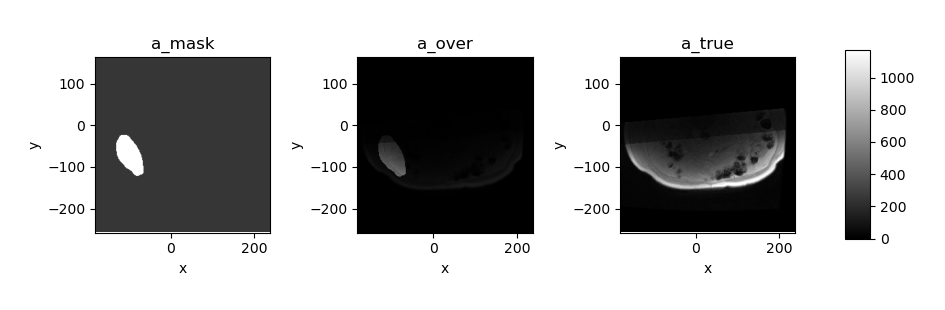

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


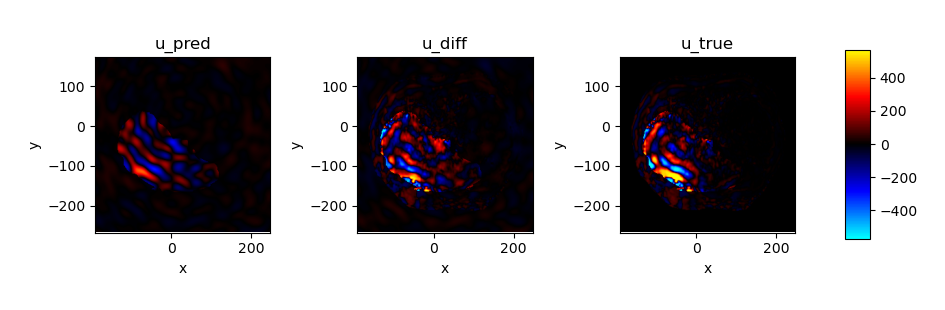

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


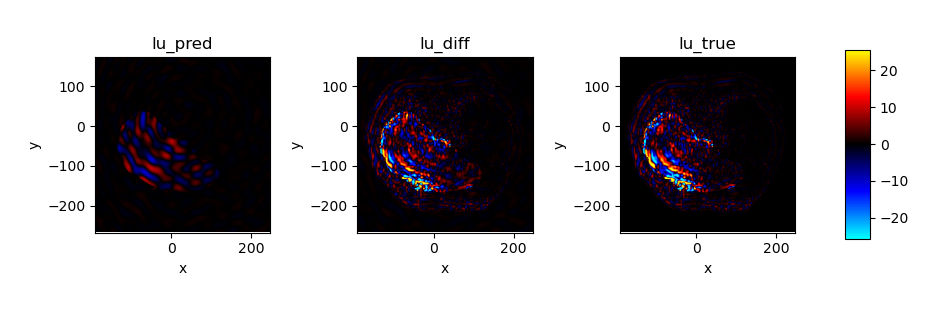

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


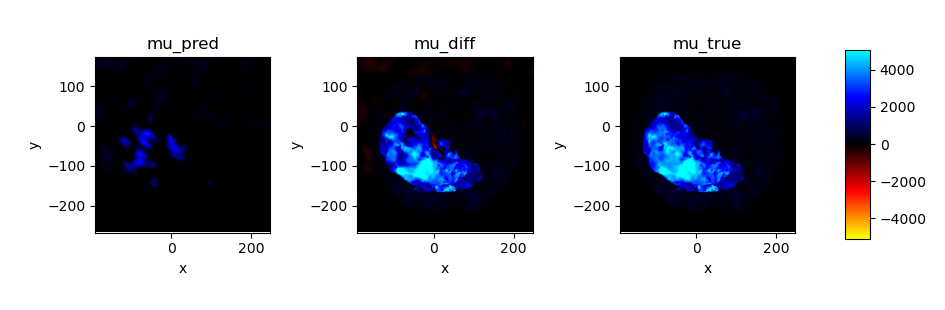

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

Time spent testing: 16.60%
10        [1.92e+04, 0.00e+00]    [3.11e+04, 0.00e+00]    []  
Time spent testing: 16.15%
20        [2.47e+04, 0.00e+00]    [3.03e+04, 0.00e+00]    []  
Time spent testing: 17.10%
30        [1.82e+04, 0.00e+00]    [2.88e+04, 0.00e+00]    []  
Time spent testing: 17.58%
40        [1.66e+04, 0.00e+00]    [2.34e+04, 0.00e+00]    []  
Time spent testing: 17.91%
50        [1.95e+04, 0.00e+00]    [2.76e+04, 0.00e+00]    []  
Time spent testing: 18.10%
60        [1.80e+04, 0.00e+00]    [2.57e+04, 0.00e+00]    []  
Time spent testing: 18.29%
70        [1.86e+04, 0.00e+00]    [2.39e+04, 0.00e+00]    []  
Time spent testing: 18.46%
80        [1.50e+04, 0.00e+00]    [2.45e+04, 0.00e+00]    []  
Time spent testing: 18.58%
90        [1.39e+04, 0.00e+00]    [2.29e+04, 0.00e+00]    []  
Time spent testing: 18.67%
100       [1.52e+04, 0.00e+00]    [1.93e+04, 0.00e+00]    []  
Time spent testing: 18.79%
110       [1.87e+04, 0.00e+00]    [1.81e+04, 0.00e+00]    []  
Time spent

920       [1.16e+04, 0.00e+00]    [1.43e+04, 0.00e+00]    []  
Time spent testing: 19.64%
930       [1.02e+04, 0.00e+00]    [1.39e+04, 0.00e+00]    []  
Time spent testing: 19.64%
940       [9.29e+03, 0.00e+00]    [1.41e+04, 0.00e+00]    []  
Time spent testing: 19.63%
950       [7.11e+03, 0.00e+00]    [1.41e+04, 0.00e+00]    []  
Time spent testing: 19.62%
960       [8.37e+03, 0.00e+00]    [1.42e+04, 0.00e+00]    []  
Time spent testing: 19.61%
970       [9.22e+03, 0.00e+00]    [1.43e+04, 0.00e+00]    []  
Time spent testing: 19.61%
980       [7.09e+03, 0.00e+00]    [1.40e+04, 0.00e+00]    []  
Time spent testing: 19.60%
990       [9.15e+03, 0.00e+00]    [1.45e+04, 0.00e+00]    []  
Time spent testing: 19.59%
1000      [6.47e+03, 0.00e+00]    [1.43e+04, 0.00e+00]    []  
Time spent testing: 19.58%
1010      [8.01e+03, 0.00e+00]    [1.45e+04, 0.00e+00]    []  
Time spent testing: 19.58%
1020      [8.37e+03, 0.00e+00]    [1.43e+04, 0.00e+00]    []  
Time spent testing: 19.57%
1030      

Time spent testing: 19.27%
1840      [7.56e+03, 0.00e+00]    [1.32e+04, 0.00e+00]    []  
Time spent testing: 19.27%
1850      [7.21e+03, 0.00e+00]    [1.35e+04, 0.00e+00]    []  
Time spent testing: 19.27%
1860      [9.01e+03, 0.00e+00]    [1.34e+04, 0.00e+00]    []  
Time spent testing: 19.28%
1870      [7.61e+03, 0.00e+00]    [1.32e+04, 0.00e+00]    []  
Time spent testing: 19.28%
1880      [6.22e+03, 0.00e+00]    [1.36e+04, 0.00e+00]    []  
Time spent testing: 19.29%
1890      [6.44e+03, 0.00e+00]    [1.34e+04, 0.00e+00]    []  
Time spent testing: 19.29%
1900      [8.40e+03, 0.00e+00]    [1.32e+04, 0.00e+00]    []  
Time spent testing: 19.29%
1910      [5.55e+03, 0.00e+00]    [1.32e+04, 0.00e+00]    []  
Time spent testing: 19.29%
1920      [5.86e+03, 0.00e+00]    [1.36e+04, 0.00e+00]    []  
Time spent testing: 19.29%
1930      [5.22e+03, 0.00e+00]    [1.33e+04, 0.00e+00]    []  
Time spent testing: 19.29%
1940      [7.70e+03, 0.00e+00]    [1.38e+04, 0.00e+00]    []  
Time spent

2750      [6.94e+03, 0.00e+00]    [1.30e+04, 0.00e+00]    []  
Time spent testing: 19.43%
2760      [7.36e+03, 0.00e+00]    [1.27e+04, 0.00e+00]    []  
Time spent testing: 19.43%
2770      [7.57e+03, 0.00e+00]    [1.29e+04, 0.00e+00]    []  
Time spent testing: 19.43%
2780      [7.52e+03, 0.00e+00]    [1.29e+04, 0.00e+00]    []  
Time spent testing: 19.43%
2790      [9.20e+03, 0.00e+00]    [1.27e+04, 0.00e+00]    []  
Time spent testing: 19.42%
2800      [7.27e+03, 0.00e+00]    [1.28e+04, 0.00e+00]    []  
Time spent testing: 19.42%
2810      [8.36e+03, 0.00e+00]    [1.29e+04, 0.00e+00]    []  
Time spent testing: 19.43%
2820      [5.78e+03, 0.00e+00]    [1.32e+04, 0.00e+00]    []  
Time spent testing: 19.43%
2830      [8.64e+03, 0.00e+00]    [1.34e+04, 0.00e+00]    []  
Time spent testing: 19.43%
2840      [7.06e+03, 0.00e+00]    [1.30e+04, 0.00e+00]    []  
Time spent testing: 19.43%
2850      [6.22e+03, 0.00e+00]    [1.27e+04, 0.00e+00]    []  
Time spent testing: 19.43%
2860      

Time spent testing: 19.50%
3670      [7.32e+03, 0.00e+00]    [1.23e+04, 0.00e+00]    []  
Time spent testing: 19.50%
3680      [7.08e+03, 0.00e+00]    [1.22e+04, 0.00e+00]    []  
Time spent testing: 19.50%
3690      [5.41e+03, 0.00e+00]    [1.22e+04, 0.00e+00]    []  
Time spent testing: 19.50%
3700      [7.32e+03, 0.00e+00]    [1.21e+04, 0.00e+00]    []  
Time spent testing: 19.50%
3710      [9.01e+03, 0.00e+00]    [1.21e+04, 0.00e+00]    []  
Time spent testing: 19.50%
3720      [6.31e+03, 0.00e+00]    [1.23e+04, 0.00e+00]    []  
Time spent testing: 19.50%
3730      [7.83e+03, 0.00e+00]    [1.21e+04, 0.00e+00]    []  
Time spent testing: 19.50%
3740      [6.15e+03, 0.00e+00]    [1.26e+04, 0.00e+00]    []  
Time spent testing: 19.50%
3750      [7.23e+03, 0.00e+00]    [1.27e+04, 0.00e+00]    []  
Time spent testing: 19.50%
3760      [9.03e+03, 0.00e+00]    [1.22e+04, 0.00e+00]    []  
Time spent testing: 19.50%
3770      [6.91e+03, 0.00e+00]    [1.22e+04, 0.00e+00]    []  
Time spent

4580      [8.77e+03, 0.00e+00]    [1.20e+04, 0.00e+00]    []  
Time spent testing: 19.54%
4590      [6.35e+03, 0.00e+00]    [1.20e+04, 0.00e+00]    []  
Time spent testing: 19.55%
4600      [6.92e+03, 0.00e+00]    [1.22e+04, 0.00e+00]    []  
Time spent testing: 19.55%
4610      [6.03e+03, 0.00e+00]    [1.31e+04, 0.00e+00]    []  
Time spent testing: 19.55%
4620      [5.78e+03, 0.00e+00]    [1.20e+04, 0.00e+00]    []  
Time spent testing: 19.55%
4630      [7.50e+03, 0.00e+00]    [1.19e+04, 0.00e+00]    []  
Time spent testing: 19.55%
4640      [4.44e+03, 0.00e+00]    [1.24e+04, 0.00e+00]    []  
Time spent testing: 19.55%
4650      [6.49e+03, 0.00e+00]    [1.25e+04, 0.00e+00]    []  
Time spent testing: 19.55%
4660      [5.55e+03, 0.00e+00]    [1.18e+04, 0.00e+00]    []  
Time spent testing: 19.55%
4670      [6.22e+03, 0.00e+00]    [1.18e+04, 0.00e+00]    []  
Time spent testing: 19.55%
4680      [7.14e+03, 0.00e+00]    [1.17e+04, 0.00e+00]    []  
Time spent testing: 19.55%
4690      

In [ ]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

model.train(100000, display_every=10, callbacks=[test_eval])